# The Navier-Stokes Equations

The systen of equations that govern the flow of any fluid were first developed by  Claude-Louis Navier around 1822, and further developed by George Gabriel Stokes from 1842-1850. The resulting set of equations has become known as the Navier-Stokes equations {cite}`navierstokes`.

These equations may be derived from the principles of conservation of mass, momentum, and energy, together with the thermodynamic state equation for the fluid in question. We will first derive these equations in a cartesian system, and generalize them later.

## Control Volume

To begin, we first consider a arbitrary control volume $R$ enclosed by a surface $S$ which has an outward unit vector $\overrightarrow{ds}$ normal to the surface.

In [5]:
%load_ext tikzmagic

The tikzmagic extension is already loaded. To reload it, use:
  %reload_ext tikzmagic


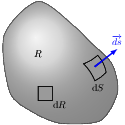

In [6]:
%%tikz
\shadedraw[ball color=gray!40,opacity=0.5] plot[smooth cycle] coordinates {(-2,1) (-0.8,2.2) (0.5,1.3) (1,0.8) (1.8,0)
(2,-1) (1.4,-2) (0,-2.1) (-1,-1.7) (-1.8,-1)};
\draw[fill=gray!40] (0.8,0) to[bend right=10] (1.3,0.3) to[bend left=15] (1.6,-0.3)
to[bend left=10] (1.2,-0.6) to[bend right=10] cycle;
\draw[blue,very thick,-latex] (1.2,-0.1) -- ++(38:1) node[above] {$\overrightarrow{ds}$};
\node[anchor=north] at (1.3,-0.6) {d$S$}; 
\node[anchor=north] at (-0.8,0.6) {$R$}; 
\draw[fill=gray!40] (-0.8,-0.8) rectangle (-0.3,-1.3) node[below right=0pt,
inner sep=0pt]{d$R$};

The shape of $R$ is arbitrary, but it does not change with time. That means that for any time-varying function $f$ we can write:

\begin{equation}
\frac{\partial}{\partial t} \iiint_R (f) dr = \iiint_R \frac{\partial f}{\partial t}
\end{equation}

## Conservation of Mass

Now, let $\overrightarrow{V}$ be the velocity of a fluid element passing through the control volume $R$. We can state the principle of conservation of mass as:

> The time rate of change of mass increase within the control volume $R$, in the absence of internal sources, is equal >to the net flux of mass into $R$ through the surface $S$.

The outward component of the mass flux at any point on $S$ is given by:

\begin{equation}
\rho \overrightarrow{V} \cdot \overrightarrow{ds}
\end{equation}

We can find the net mass flux into $R$ by integrating this expression over the complete surface:

\begin{equation}
\iint_S{ - (\rho \overrightarrow{V}\cdot\overrightarrow{ds})}
\end{equation}

This surface integral can be converted into a volume integral by making use of the *Divergence Theorem*:

\begin{equation}
\iint_S \overrightarrow{q}\cdot\overrightarrow{ds} = \iiint_R \left( \overrightarrow{\nabla} \cdot \overrightarrow{q}\right) dR
\end{equation}

Thus the total mass flux becomes:

\begin{equation}
-\iiint_R \left( \overrightarrow{\nabla}\cdot\rho\overrightarrow{V}\right) dR
\end{equation}

The conservation of mass law becomes:
    
\begin{equation}
\iiint_R \frac{\partial\rho}{\partial t} dR = -\iiint_R ( \overrightarrow{\nabla}\cdot\rho\overrightarrow{V}) dR
\end{equation}

or

\begin{equation}
\iiint_R \left[\frac{\partial\rho}{\partial t} + \overrightarrow{\nabla}\cdot\rho\overrightarrow{V}\right] dR = 0
\end{equation}

But, since the volume is arbitrary, the integrand must be zero, giving this final form:

\begin{equation}
\frac{\partial\rho}{\partial t} + \overrightarrow{\nabla}\cdot\rho\overrightarrow{V} = 0
\end{equation}

## Conservation of Momentum

The conservation of momentum law is stated as follows:

> the time rate of momentum increase throughout $R$ is equal to the net force acting on $R$ plus the net flux of
> momentum into $R$ through the surface $S$.

The net force acting on $R$ will consist of any externally applied body force plus the forces acting on $R$ that stem from the motion of the fluid itself. These later forces are the internal stress forces acting on the fluid volume. Since any body forces will be specified, we need to find a way to describe the internal shear forces.  

Stress is related to the forces exerted on a fluid particle by adjacent particles. If we cut our control volume with a plane, the force per unit area acting on one side of the plane is caused by the fluid particles on the other side of the plane. Since  the stresses measured at any point will be different for each plane cut passing through that point, the minimum amount of information necessary to completely describe the stress state at that point must be determined.

Consider an arbitrary tetrahedron with three sides joining at a point in the flow, and assume that the stress on these three sides is known. Then the condition of state equilibrium can be used to find the stress on the fourth side of this shape, regardless of the orientation of that fourth face with respect to the other three. From this argument it may be seen that the stress state at a point may be determined if the stresses on any three surfaces passing through that point are known. For convenience, these three surfaces are usually assumed to be orthogonal. Note that the three stresses are vector quantities that can be expressed as a set of vector components. Furthermore, the conditions of static equilibrium will result in a total of nine vector components, but only six are independent.

The standard way to describe the stress state at a point in to set up a stress matrix $\tau$ that looks like this:

\begin{equation}
\tau = \begin{bmatrix}
\tau_{xx} & \tau_{xy} & \tau_{xz}\\
\tau_{yx} & \tau_{yy} & \tau_{yz} \\
\tau_{zx} & \tau_{zy} & \tau_{zz}
\end{bmatrix}
\end{equation}

In this notation $\tau_{xy}$ is the $y$ component of the stress acting on the face perpendicular to the $x$ axis.

The three dependent stresses are:

\begin{align*}
\tau_{xy} &= \tau_{yx} \\
\tau_{xz} &= \tau_{zx} \\
\tau_{yz} &= \tau_{zy}
\end{align*}

Therefore, the stress matrix is seen to be symmetric.

In general, as a fluid volume moves, it will both deform and rotate. If we consider two points along the path of this motion, we can use a *Taylor's Series* to relate the velocity at one point to the velocity at the other. In cartesian coordinates this becomes:

\begin{equation}
\begin{aligned}
U_B = U_A & + \left(\frac{\partial U}{\partial x}\right)_A (x_B - x_A) \\
    & + \frac{1}{2}\left(\frac{\partial^2 U}{\partial x^2}\right)_A (x_b - x_A)^2 \\
    & + \left(\frac{\partial U}{\partial y}\right)_A (y_B - y_A) \\
    & + \frac{1}{2}\left(\frac{\partial^2 U}{\partial y^2}\right)_A (y_b - y_A)^2 \\
    & + \left(\frac{\partial U}{\partial z}\right)_A (z_B - z_A) \\
    & + \frac{1}{2}\left(\frac{\partial^2 U}{\partial z^2}\right)_A (z_b - z_A)^2 \\
    & + \left(\frac{\partial^2 U}{\partial x \partial y}\right)_A (x_B - x_A)(y_B - y_A) \\
    & + \left(\frac{\partial^2 U}{\partial x \partial z}\right)_A (x_B - x_A)(z_B - z_A) + \cdots
\end{aligned}
\end{equation}

We can write similar equations for the remaining two velocity components. If we only retail the linear terms, this reduced to:

\begin{equation}
U_B = U_A + \left(\frac{\partial U}{\partial x}\right)_A (x_B - x_A)  + \left(\frac{\partial U}{\partial y}\right)_A (y_B - y_A)  + \left(\frac{\partial U}{\partial z}\right)_A (z_B - z_A)
\end{equation}